#Importing Required Libraries

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from matplotlib import style


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Iris.csv to Iris.csv
User uploaded file "Iris.csv" with length 5107 bytes


#Data Visualization

In [3]:
iris_df=pd.read_csv('Iris.csv')

In [4]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [6]:
iris_df= iris_df.drop('Id', axis=1)

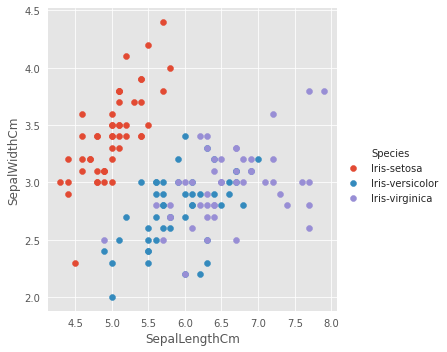

In [68]:
style.use('ggplot')
sns.FacetGrid(iris_df, hue="Species", height=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();


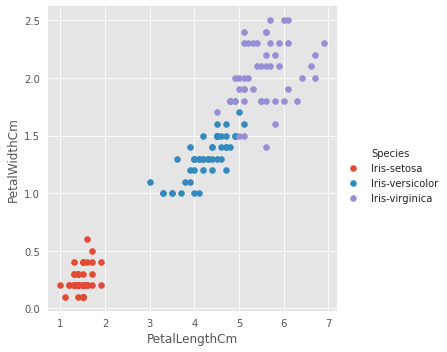

In [69]:
sns.FacetGrid(iris_df, hue="Species", height=5) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();


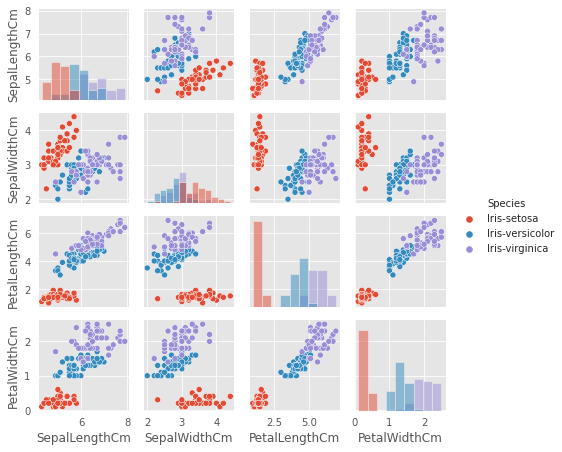

In [80]:
sns.pairplot(iris_df, hue="Species", diag_kind="hist", height=1.6)
plt.show()

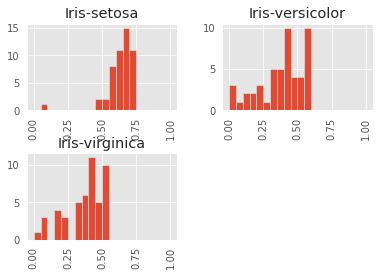

<Figure size 504x504 with 0 Axes>

In [77]:
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['Species'] = iris_df['Species']
df_scores.hist(by='Species', column='SilhouetteScore',range=(0,1.0), bins=20)
plt.figure(figsize=(7,7))
plt.show()

#Kmeans Model

In [71]:
X=iris_df.iloc[:,0:4]
x=iris_df.iloc[:,0:4].values
y=iris_df.iloc[:,-1]

In [72]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)


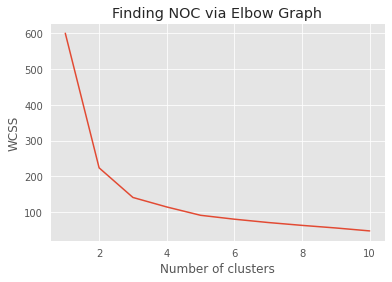

In [84]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Finding NOC via Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

It is evident from the elbow graph that the ideal number of clusters required is 3

In [73]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [74]:
km = KMeans(n_clusters=3, random_state=0)
km.fit(X_scaled)
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

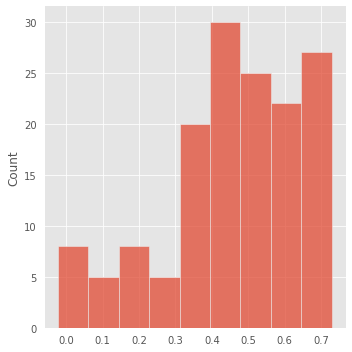

In [79]:
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.displot(scores)

#Model Accuracy

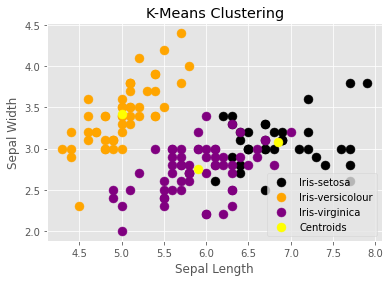

In [50]:
style.use('ggplot')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 80, c = 'black', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 80, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 80, c = 'purple', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 80, c = 'yellow', label = 'Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

In [82]:

from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
print("The Silhouette Scores is" ,score)

The Silhouette Scores is 0.4589717867018717


In [81]:
from sklearn.metrics.cluster import adjusted_rand_score
score = adjusted_rand_score(y, y_cluster_kmeans)
print("ARI Score is",score)

ARI Score is 0.6201351808870379


K_Means clustering model is pretty decent as

1.Silhoutte score indicates the clusters to be overlapping or too close

2.ARI Score shows that the model is almost 62% accurate in its cluster predictions